number of articles: 428
number of extracted features: 13518
5 example articles with their extracted features
   00  000  000th  001st  0051  007  0100  0130  028  05  ...  zola  zombie  \
0   0    1      0      0     0    0     0     0    0   0  ...     0       0   
1   0    0      0      0     0    0     0     0    0   0  ...     0       0   
2   0    0      0      0     0    0     0     0    0   0  ...     0       0   
3   0    0      0      0     0    0     0     0    0   0  ...     0       0   
4   0    0      0      0     0    0     0     0    0   0  ...     0       0   

   zombies  zone  zonealarm  zones  zoom  zooms  zooropa  zorro  
0        0     0          0      0     0      0        0      0  
1        0     0          0      0     0      0        0      0  
2        0     0          0      0     0      0        0      0  
3        0     0          0      0     0      0        0      0  
4        0     0          0      0     0      0        1      0  

[5 rows x 13518 col

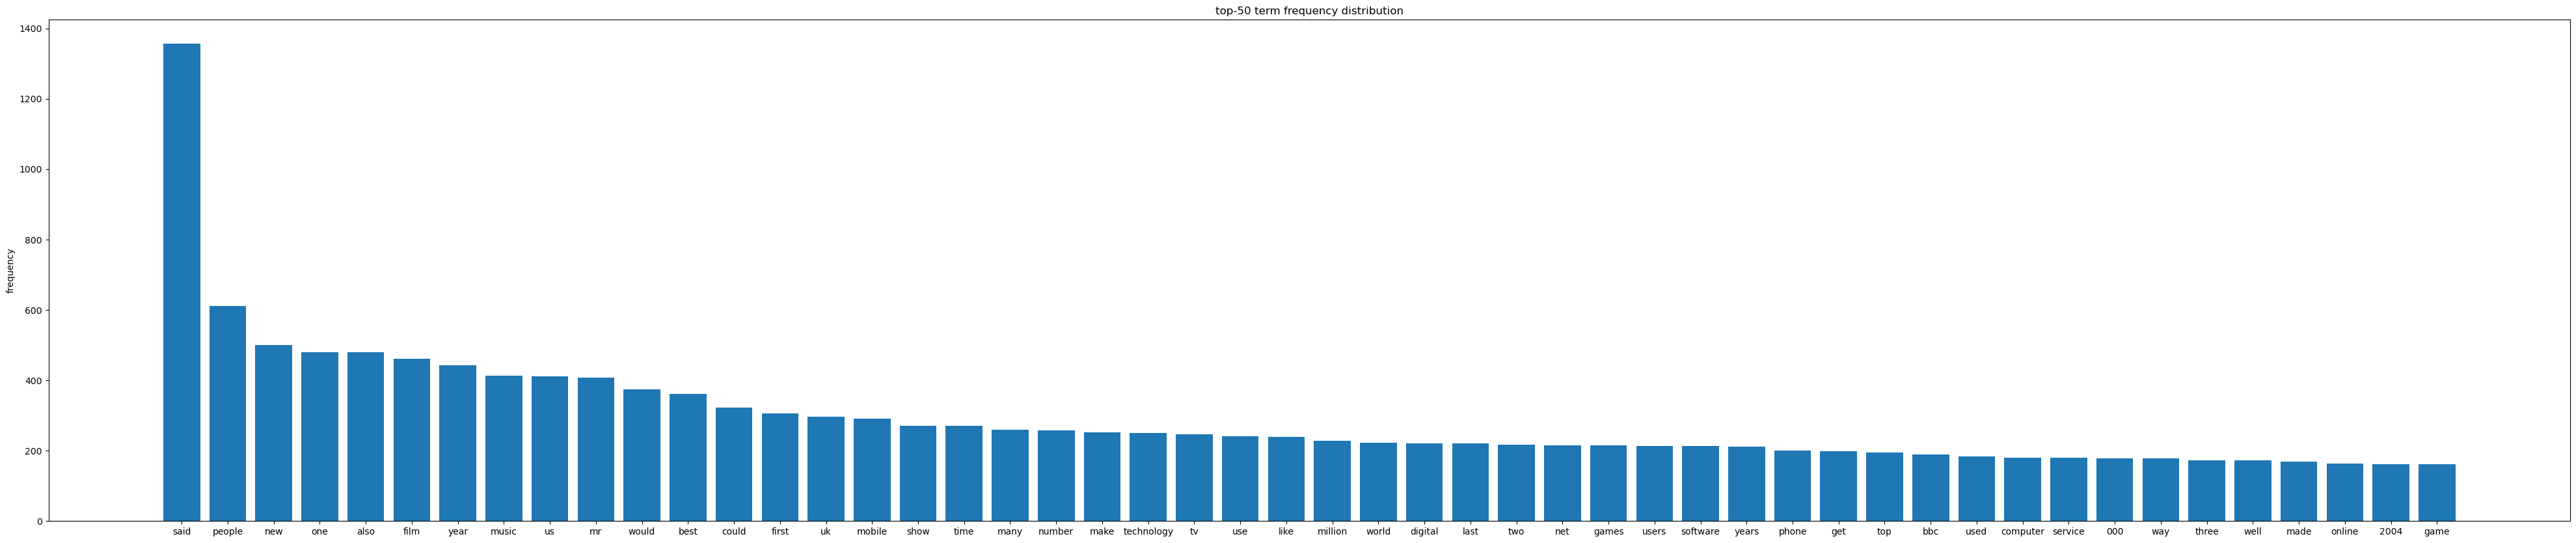

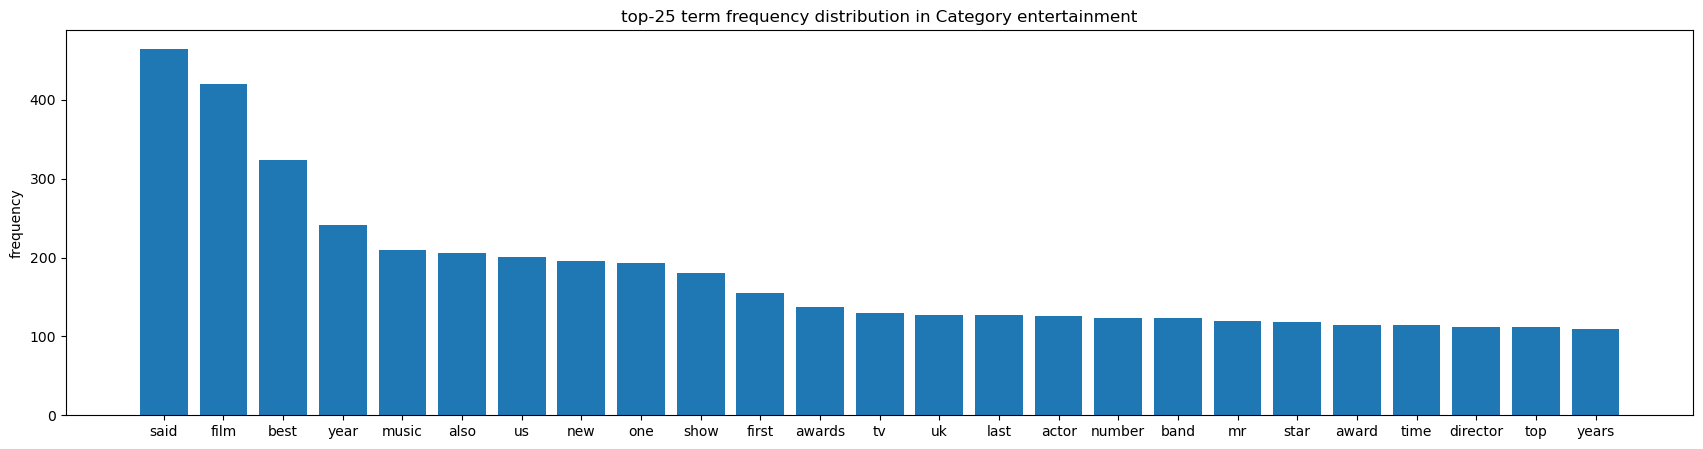

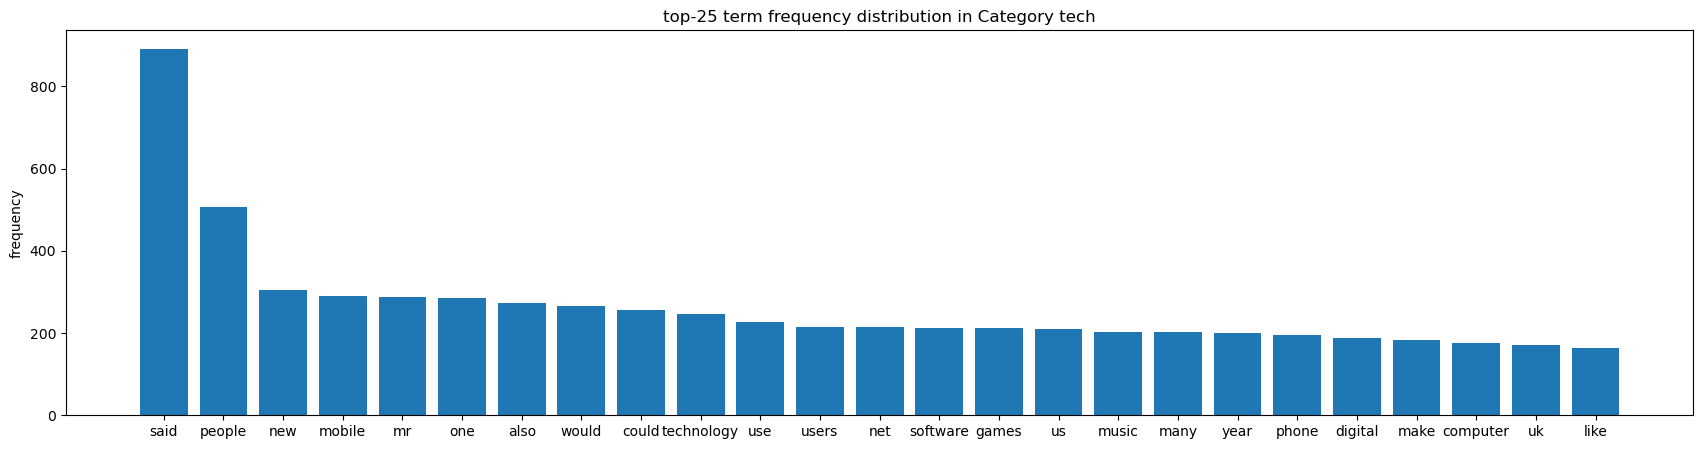

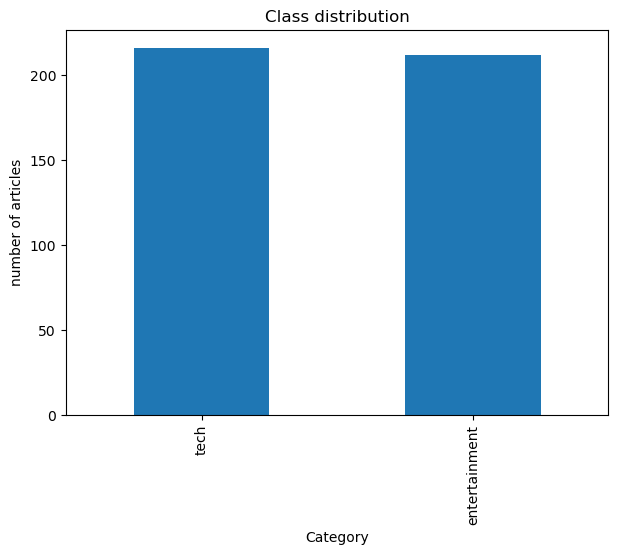

In [30]:
#Task 1(a)
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv("train.csv")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
print(f"number of articles: {X.shape[0]}")
print(f"number of extracted features: {X.shape[1]}")
example_df = pd.DataFrame(
    X[:5].toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("5 example articles with their extracted features")
print(example_df)

#Task 1(b)
plt.figure(figsize=(50,10))
total_word = (' '.join(df['Text'])).split()
frequency = Counter(total_word).most_common(50)
plt.bar([w[0] for w in frequency],[w[1] for w in frequency])
plt.title("top-50 term frequency distribution")
plt.ylabel('frequency')
plt.show()

label = ['entertainment','tech']
for l in label:
    plt.figure(figsize=(21,5))
    total_text = (' '.join(df[df['Category'] == l]['Text'])).split()
    frequency = Counter(total_text).most_common(25)
    plt.bar([w[0] for w in frequency],[w[1] for w in frequency])
    plt.title(f"top-25 term frequency distribution in Category {l}")
    plt.ylabel('frequency')
    plt.show()

plt.figure(figsize=(7,5))
df['Category'].value_counts().plot(kind = 'bar')
plt.title('Class distribution')
plt.ylabel('number of articles')
plt.show()

In [31]:
#Task 2 (a)
from sklearn.naive_bayes import MultinomialNB
y = df['Category']
words = vectorizer.get_feature_names_out()
nb_all_data = MultinomialNB()
nb_all_data.fit(X,y)

logprob = nb_all_data.feature_log_prob_
prob = np.exp(logprob)
classes = enumerate(nb_all_data.classes_)

#(i)
print('Top-20 words that most likely to occurr')
for index, cla in classes:
    indice = np.argsort(-prob[index])[:20]
    word = words[indice]
    print(f"Category {cla}: {list(word)}")
print('\n')

#(ii)
print('Top-20 words that maximize the quantity')
classes = enumerate(nb_all_data.classes_)
for index, cla in classes:
    p_Yequaly = logprob[index]
    p_Ynotequaly = logprob[1-index]
    logratio = p_Yequaly - p_Ynotequaly

    ratio = np.exp(logratio)
    indice = np.argsort(-ratio)[:20]
    word = words[indice]
    print(f"Category {cla}: {list(word)}")


Top-20 words that most likely to occurr
Category entertainment: ['said', 'film', 'best', 'year', 'music', 'also', 'us', 'new', 'one', 'show', 'first', 'awards', 'tv', 'uk', 'last', 'actor', 'number', 'band', 'mr', 'star']
Category tech: ['said', 'people', 'new', 'mobile', 'mr', 'one', 'also', 'would', 'could', 'technology', 'use', 'users', 'net', 'software', 'games', 'us', 'music', 'many', 'year', 'phone']


Top-20 words that maximize the quantity
Category entertainment: ['actress', 'singer', 'oscar', 'stars', 'aviator', 'band', 'nominated', 'rock', 'festival', 'album', 'nominations', 'charles', 'chart', 'foxx', 'oscars', 'starring', 'singles', 'jamie', 'swank', 'comedy']
Category tech: ['users', 'software', 'microsoft', 'mobile', 'broadband', 'virus', 'firms', 'pc', 'spam', 'phones', 'gadget', 'net', 'consumer', 'mobiles', 'gadgets', 'windows', 'machines', 'technologies', 'systems', 'device']


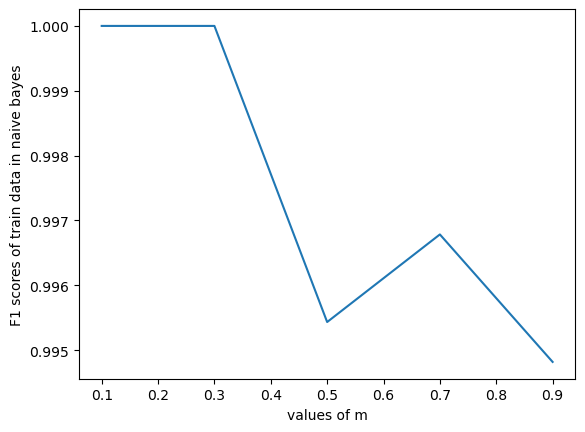

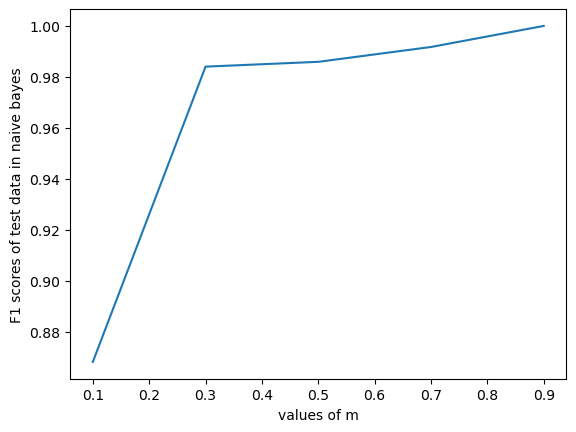

Best alpha value is 0.1 with an accuracy of 0.9860191518467852
f1-score for test data: 0.989010989010989
accuracy for test data: 99.05660377358491%


In [33]:
#Task 3 (a)
from sklearn.metrics import f1_score
mlist = [0.1,0.3,0.5,0.7,0.9]
train_f1_score = []
test_f1_score = []
total_article = X.shape[0]
for m in mlist:
    X_train = X[0:int(m * total_article)]
    y_train = y[0:int(m * total_article)]
    X_test = X[int(m * total_article):]
    y_test = y[int(m * total_article):]
    nbmodel =  MultinomialNB()
    nbmodel.fit(X_train, y_train)
    train_predict = nbmodel.predict(X_train)
    train_f1 = f1_score(y_train, train_predict, pos_label = label[1])
    train_f1_score.append(train_f1)
    test_predict = nbmodel.predict(X_test)
    test_f1 = f1_score(y_test, test_predict, pos_label = label[1])
    test_f1_score.append(test_f1)
#(i)    
plt.plot(mlist, train_f1_score)
plt.xlabel("values of m")
plt.ylabel("F1 scores of train data in naive bayes")
plt.show()
#(ii)
plt.plot(mlist, test_f1_score)
plt.xlabel("values of m")
plt.ylabel("F1 scores of test data in naive bayes")
plt.show()

#Task 3(b)
from sklearn.model_selection import cross_val_score
alpha_values = [0.1 * x for x in range(1,51)]
accuracy_score_ = []

for a in alpha_values:
    model_cv = MultinomialNB(alpha = a)
    score = cross_val_score(model_cv, X, y, cv = 5, scoring = 'accuracy')
    accuracy_score_.append(np.mean(score))

    
best_alpha_index = accuracy_score_.index(max(accuracy_score_))
best_alpha = alpha_values[best_alpha_index]
print(f"Best alpha value is {best_alpha} with an accuracy of {max(accuracy_score_)}")

#Task 3(c)
df_test = pd.read_csv("test.csv")

all_text = pd.concat([df['Text'],df_test['Text']])
final_vectorizer = CountVectorizer().fit(all_text)
X = final_vectorizer.transform(df['Text'])
from sklearn.metrics import accuracy_score
final_nb_model = MultinomialNB(alpha = best_alpha)
final_nb_model.fit(X,y)
X_test = final_vectorizer.transform(df_test['Text'])
y_test = df_test['Category']
test_prediction = final_nb_model.predict(X_test)
test_f1_score = f1_score(y_test, test_prediction, pos_label = label[1])
test_accuracy = accuracy_score(y_test, test_prediction)
print(f"f1-score for test data: {test_f1_score}")
print(f"accuracy for test data: {test_accuracy * 100}%")
    

    

Task 2(a) discussion

The list of the top 20 words that maximise the P(Xw = 1|Y = y)/P(Xw = 1|Y != y) describes the two classes better. The list in (i) only displays words that appear frequently in different categories, which contain many meaningless and commonly used words. These common words will appear in both categories, for example, 'said' appears in both categories in list (i). At the same time, the list in (ii) highlights the probability of words that appear frequently in only one category, while reducing the probability of common words that appear in both categories. Most of the words in list (ii) have marked features of the specific category. Therefore, the list in (ii) describes the two classes better.

Task 3(a) discussion for naive bayes

For low m (m = 0.1, m = 0.3), the F1 score of training data is very high, and the F1 score of testing data increases rapidly from a relatively low value. When the training data set increases from a very small set, the prediction of the testing data is trending to have increasing accuracy. As the training data set is still very small, it is very easy for the model to make the correct prediction on the training data.
For middle m (m from 0.3 to 0.5), the F1 score of training data decreases from a very high value to a relatively high value, and the F1 score of testing data increases more slowly to a relatively high value. As the training data set increases, it has relatively lower accuracy when making predictions on the training data as it tends to be less overfitting on training data as the size of training data set increases, and the accuracy of predictions on test data increases when the size of the training data set increases.
For large m, the F1 score of testing data grows very high, and the F1 score of training data is still high, but relatively lower than for small m. The F1 scores for the training data and testing data are similar, which shows that the model gives high accuracy in both the training data and the testing data when m is large.

Task 3(b) discussion

The hyperparameter alpha is used in Laplace smoothing, it controls how sensitive the model is towards the rare features. A model with a small alpha value will be more sensitive towards rare features. In this question, as the two categories have very different articles, a small alpha value of 0.1 gives the best accuracy in testing.

Task 3(c) naive bayes

This model gets an F1-score of 0.989 and an accuracy of 99.0566%.